In [1]:
from itertools import product, combinations
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from itertools import product
import numpy as np

%matplotlib inline

In [2]:
def make_symmetric(a, b, c):
    return np.array(
        [
            [a, b],
            [b, c]
        ]
    )

def pos_semi_def(A, tol=1e-8):
    E, V = eigh(A)
    return np.all(E > -tol)

min_real, max_real = -1, 1
num_items = 50

ranges = np.random.uniform(min_real, max_real, num_items)

possible_matrices = np.array([
    elems
    for elems in product(*[ranges] * 3)
    if pos_semi_def(make_symmetric(*elems))
])

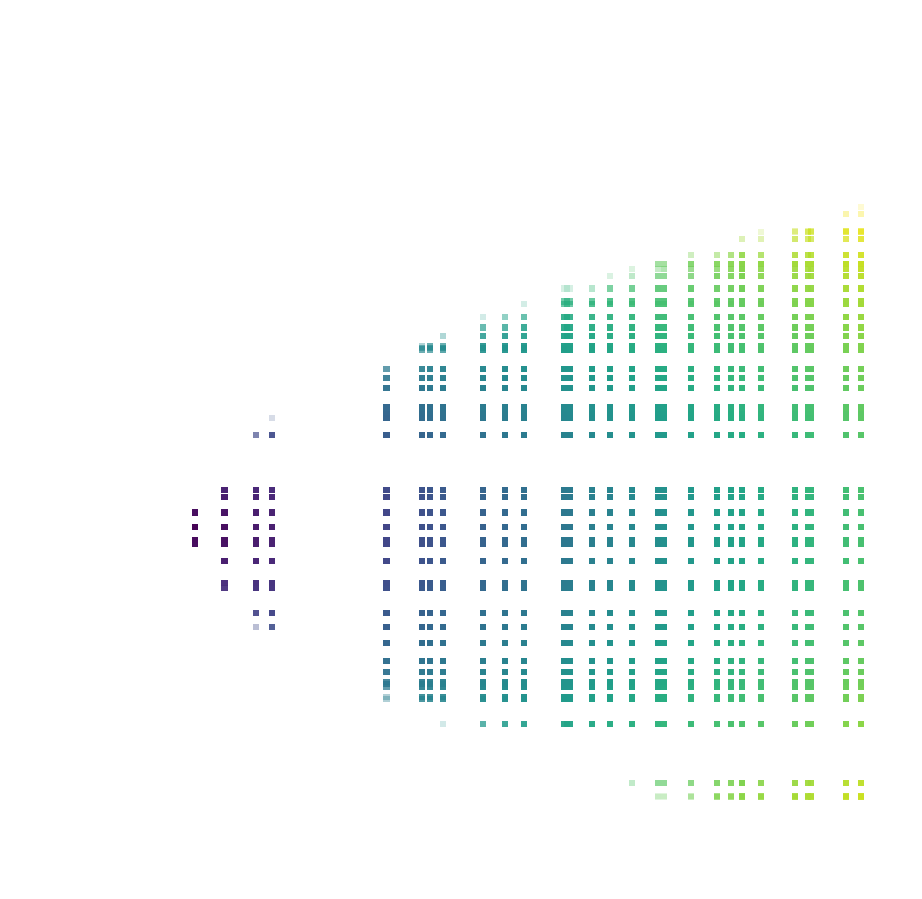

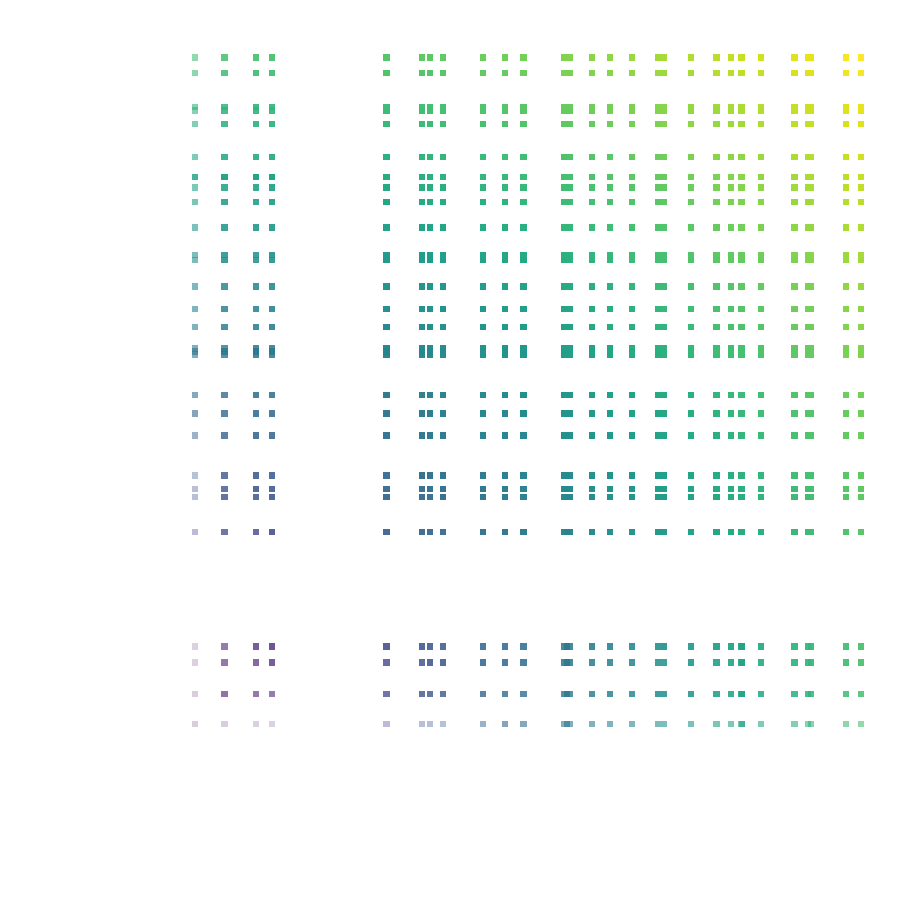

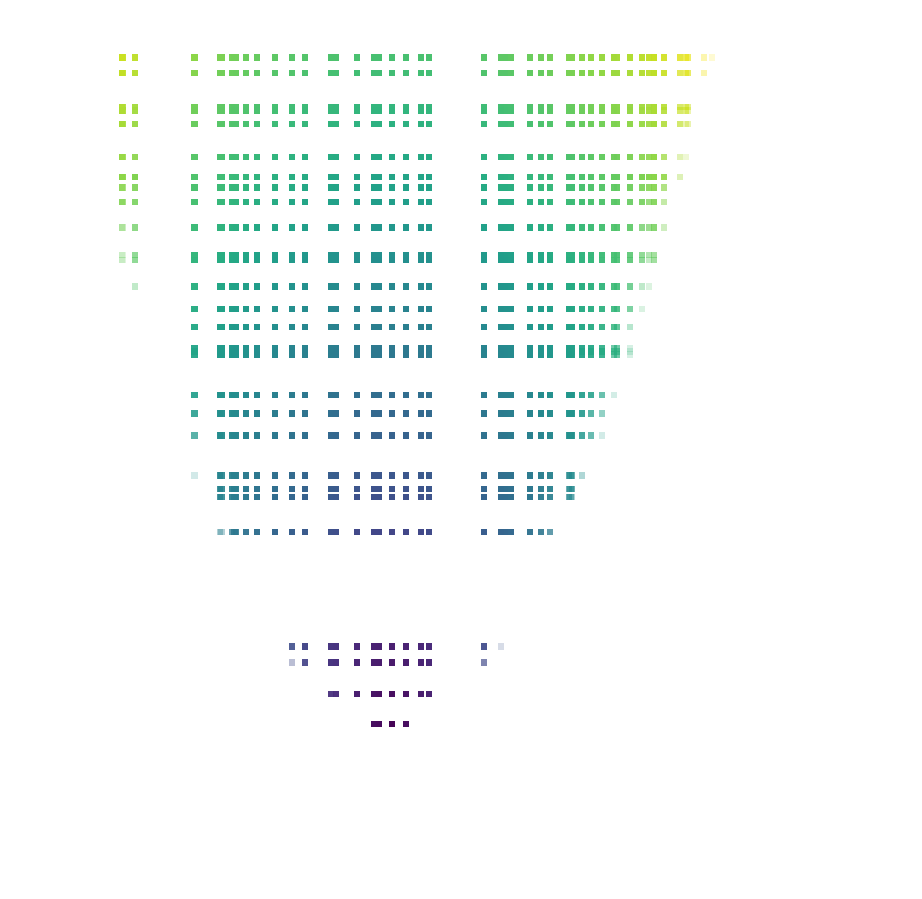

In [3]:
max_norm = np.max(np.linalg.norm(possible_matrices, axis=1))

for view in map(np.array, combinations(range(3), 2)):
    plt.figure(figsize=(11, 11))
    plt.scatter(
        *possible_matrices.T[view],
        alpha=0.2, marker=',', edgecolors='none',
        c=np.linalg.norm(possible_matrices[:, view], axis=1) / max_norm,
        cmap='viridis'
    )
    plt.axis('off');